In [11]:
%matplotlib inline 

import cv2
import numpy as np
import copy
import matplotlib.pyplot as plt
import math
import pandas as pd
import imutils
import sys
# sys.path.append('/media/recode/DATA2/Object_detector_test/')
# from barcode_detector_gray import BarcodeDetector

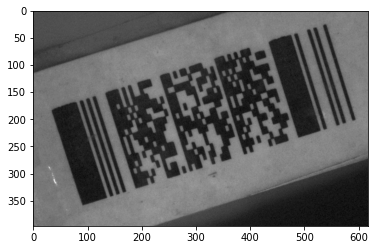

In [12]:
INPUT_CROP = '/media/Work/Codes/Private/pdf417-decoder/input/images/crop_image.png'
crop_image = cv2.imread(INPUT_CROP, 0)
plt.imshow(crop_image, cmap='gray')

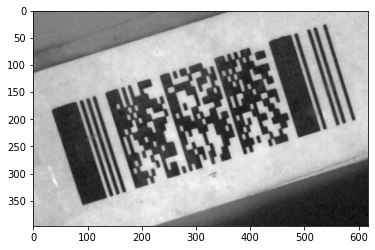

In [13]:
kernel = np.ones((3,3),np.uint8)
crop_image = cv2.morphologyEx(crop_image, cv2.MORPH_OPEN, kernel)
plt.imshow(crop_image, cmap='gray')

245346
[17.0, 34.0, 9.0, 4.0, 6.0, 567.5, 4.0, 2.0, 2.0, 2.0, 7.0, 5.5, 2.0, 2.0, 14.5, 123.0, 6.0, 6.0, 6.0, 48.5, 9.0, 99.5, 2.0, 159.5, 2.0, 8.5, 2.0, 2.0, 22.5, 17.5, 13.5, 68.0, 21.0, 12.5, 4.0, 4.0, 88.0, 2.0, 8.0, 23.5, 4.0, 4.0, 4.0, 473.5, 11.0, 2.0, 4.0, 2.0, 427.0, 2.0, 4.0, 2.0, 2.0, 4.0, 8.5, 9.0, 11.5, 4.0, 4.0, 6.0, 4.0, 6.0, 4.0, 27.0, 8.5, 6.0, 4.0, 6.0, 6.0, 4.0, 11.5, 4.0, 8.5, 4.0, 49.5, 4.0, 6.0, 4.0, 16.5, 4.0, 4.0, 4.0, 13.0, 6.0, 64.0, 4.0, 12.5, 83.0, 2.0, 245.5, 2.0, 2.0, 5.5, 2.0, 87.5, 6.0, 4.0, 6.0, 99.0, 2.0, 4.0]


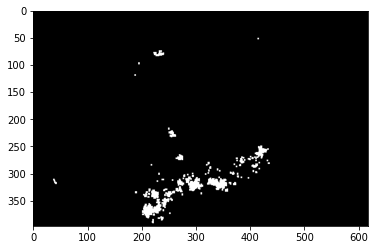

In [14]:
print(crop_image.shape[0] * crop_image.shape[1])
# new_image = imutils.rotate_bound(new_image.copy(),theta)
thresh = cv2.threshold(crop_image.copy(), 140, 255, cv2.THRESH_BINARY)[1]
_,contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

area_arr = []
for c in contours:
    area_arr.append(cv2.contourArea(c))
print(area_arr)

c_max = max(contours, key = cv2.contourArea)
for c_max in contours:
    immask=cv2.drawContours(thresh,[c_max], 0, 255, -1)
    
plt.imshow(immask, cmap='gray')

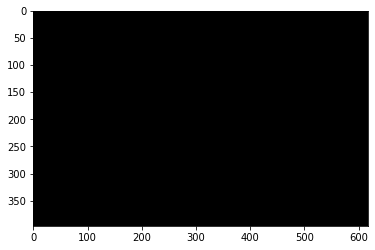

In [15]:
des = cv2.bitwise_not(immask)
_, contour, hier = cv2.findContours(des,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for cnt in contour:
    cv2.drawContours(des,[cnt],0,255,-1)

gray = cv2.bitwise_not(des)

plt.imshow(gray, cmap='gray')

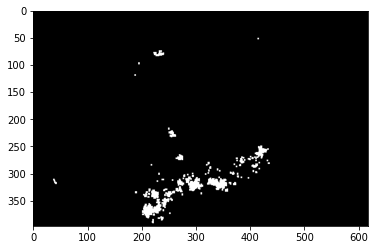

In [16]:
#Rotated image
plt.imshow(thresh, cmap='gray')

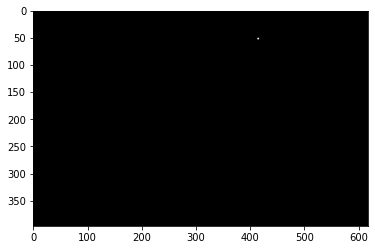

In [17]:
imgcpy = np.zeros(gray.shape).astype(gray.dtype)
immask=cv2.drawContours(imgcpy,[c], 0, 255, -1)
plt.imshow(immask, cmap='gray')

In [18]:
def overlay_corners(image, corners, radius, color, inplace=False):
    if not inplace:
        overlaid_image = copy.deepcopy(image)
    else:
        overlaid_image = image

    corners = tuple(map(tuple, corners))
    for corner in corners:
        cv2.circle(overlaid_image, corner, radius, color, -1)
    return overlaid_image

In [19]:
def all_corners(var_gray_img, threshold=0.25):

    corners = cv2.goodFeaturesToTrack(var_gray_img, 1000, threshold, 10)
    var_all_corners = np.array(tuple(map(np.ravel, corners)), dtype=np.int0)
    
    return var_all_corners


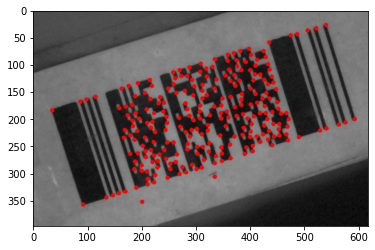

In [20]:
var_all_corners = all_corners(crop_image,threshold=0.2)
debug_img = cv2.merge((crop_image, crop_image, crop_image))

pt1_thickness, pt1_color = 4, (255, 0, 0)
debug_img = overlay_corners(debug_img, var_all_corners, pt1_thickness, pt1_color)
plt.imshow(debug_img)